<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/HW6/SNdataLineFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Objective: fit supernova cosmology data : the linear relationship between logarithm redshift and luminosity of supernovae is evidence of the expansion of the Universe. In this homework you will fit the supernova data with a line, in the next class we will discover evidence of the *accelerated* expansion of the Universe

# Get the data

Download the supernova (SN) data used in the Betoule 2014 paper https://arxiv.org/abs/1401.4064. The data can be obtained here 
http://supernovae.in2p3.fr/sdss_snls_jla/ReadMe.html

As it says on the webpage: "The JLA C++ code and data are available from a single archive: jla_likelihood_v6.tgz". 
Download it and unpack it (untar unzip) within the notebook (mounting your drive on colab etc) and move the data to the folder /drive/My Drive/dsps/data

The input data file is named jla_lcparams.txt


In [1]:
from google.colab import drive
drive.mount("/content/drive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import optimize
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")


Populating the interactive namespace from numpy and matplotlib


In [0]:
#downloading data file
!wget http://supernovae.in2p3.fr/sdss_snls_jla/jla_likelihood_v6.tgz

--2019-10-17 16:23:14--  http://supernovae.in2p3.fr/sdss_snls_jla/jla_likelihood_v6.tgz
Resolving supernovae.in2p3.fr (supernovae.in2p3.fr)... 134.158.152.153
Connecting to supernovae.in2p3.fr (supernovae.in2p3.fr)|134.158.152.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23716633 (23M) [application/x-gzip]
Saving to: ‘jla_likelihood_v6.tgz’

jla_likelihood_v6.t 100%[===================>]  22.62M  5.89MB/s    in 5.3s    

2019-10-17 16:23:20 (4.24 MB/s) - ‘jla_likelihood_v6.tgz’ saved [23716633/23716633]



In [0]:
mkdir "drive/My Drive/dsps/data"

In [0]:
#untaring the data file
!tar  xzf  jla_likelihood_v6.tgz 

In [0]:
!mv jla_likelihood_v6/ "drive/My Drive/dsps/data"

In [0]:
#reading data as a dataframe
jla = pd.read_csv("drive/My Drive/dsps/data/jla_likelihood_v6/data/jla_lcparams.txt", sep=" ")

In [4]:
jla.head()

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
0,03D1au,0.503084,0.5043,0,23.001698,0.088031,1.273191,0.150058,-0.012353,0.030011,9.517,0.1105,52909.745220,0.214332,0.000790,0.000440,-0.000030,1,36.043210,-4.037469,0.001697
1,03D1aw,0.580724,0.5820,0,23.573937,0.090132,0.974346,0.273823,-0.025076,0.036691,9.169,0.0880,52902.898002,0.352732,0.002823,0.000415,0.001574,1,36.061634,-4.517158,0.000843
2,03D1ax,0.494795,0.4960,0,22.960139,0.088110,-0.728837,0.102069,-0.099683,0.030305,11.580,0.1125,52915.923670,0.111634,0.000542,0.000475,-0.000024,1,36.097287,-4.720774,0.001692
3,03D1bp,0.345928,0.3470,0,22.398137,0.087263,-1.155110,0.112834,-0.040581,0.026679,10.821,0.1235,52920.249015,0.102828,0.001114,0.000616,0.000295,1,36.657235,-4.838779,-0.000270
4,03D1co,0.677662,0.6790,0,24.078115,0.098356,0.618820,0.404295,-0.039380,0.067403,8.647,0.2840,52954.458342,0.454715,0.011857,0.000780,0.005898,1,36.567748,-4.935050,-0.002855


In [0]:
jla.describe()

,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
count,740.000000,740.000000,740.0,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.323804,0.324449,0.0,20.904956,0.115913,0.036599,0.311099,-0.023862,0.038897,9.795341,0.827140,53527.309187,0.382252,0.006210,0.000645,0.002665,1.860811,93.551713,5.726200,-0.004195
std,0.276869,0.276748,0.0,2.655143,0.018761,0.988559,0.211398,0.084112,0.015706,1.395068,3.369119,1023.254711,0.299172,0.010127,0.000947,0.005317,0.715821,119.504602,22.728815,0.006796
min,0.010060,0.009370,0.0,14.148421,0.085341,-2.862959,0.017738,-0.250149,0.011882,5.000000,0.004500,48076.401017,0.021321,-0.044995,-0.004558,-0.011397,1.000000,-55.207462,-66.485085,-0.036389
25%,0.124240,0.124418,0.0,19.735791,0.101604,-0.650131,0.148408,-0.084578,0.026015,9.316750,0.106875,53360.155972,0.164968,0.000646,0.000440,0.000061,1.000000,4.812357,-1.037904,-0.008439
50%,0.229045,0.230515,0.0,21.098947,0.114480,0.165391,0.267931,-0.030434,0.034759,10.193500,0.182750,53685.973783,0.307975,0.003097,0.000630,0.000919,2.000000,36.667567,0.237261,-0.001083
75%,0.498216,0.499000,0.0,23.043200,0.124173,0.775606,0.420354,0.030961,0.049647,10.710250,0.290500,54041.338277,0.509950,0.008213,0.000971,0.003591,2.000000,190.881058,2.146795,-0.000380
max,1.299106,1.300000,0.0,26.046776,0.174566,2.337170,1.641345,0.259538,0.106505,11.817000,54.194000,54555.109466,2.336975,0.069409,0.008604,0.053578,4.000000,359.635090,79.031740,0.002649


In [5]:
#columns in the dataframe
jla.columns

Index([u'#name', u'zcmb', u'zhel', u'dz', u'mb', u'dmb', u'x1', u'dx1',
       u'color', u'dcolor', u'3rdvar', u'd3rdvar', u'tmax', u'dtmax',
       u'cov_m_s', u'cov_m_c', u'cov_s_c', u'set', u'ra', u'dec', u'biascor'],
      dtype='object')

Use pandas scatter matrix to see the relationship between variables (Lab6). If you look in HW5 you can see how to rotate the labels

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'["sans-serif"]'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


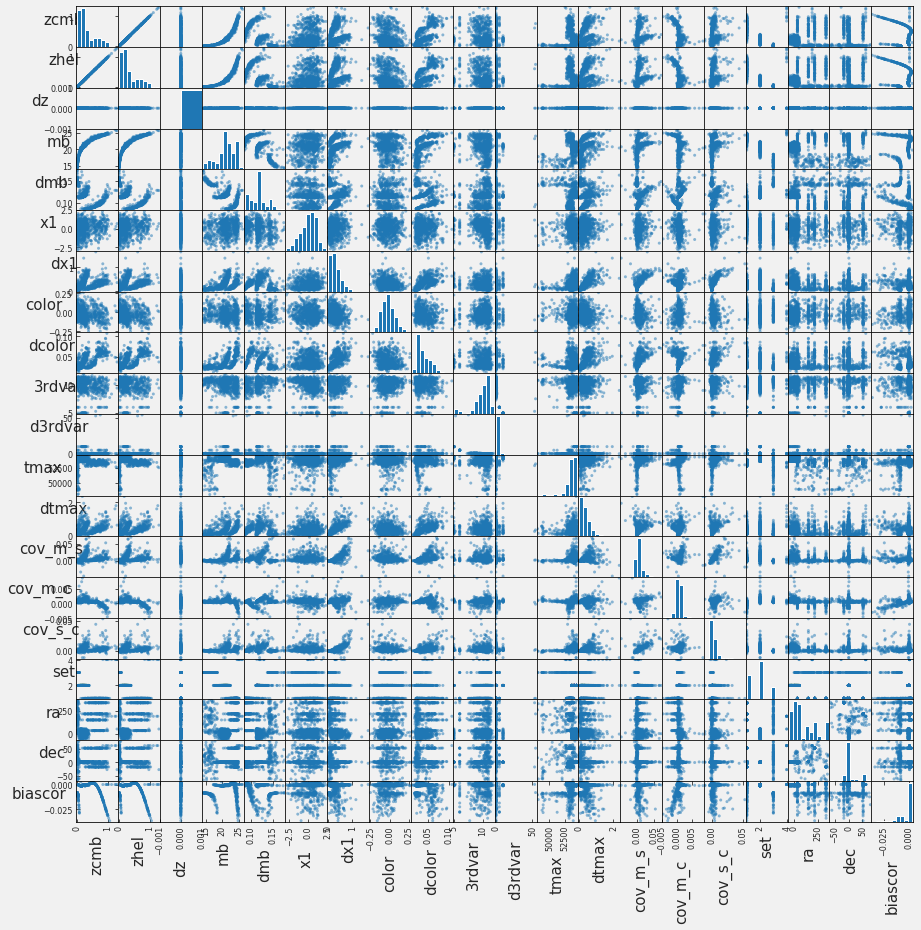

In [6]:
#matrixplot of the data for vizualization
ax = pd.plotting.scatter_matrix(jla, figsize=(15,15));
for x in range(len(ax)):
    for y in range(len(ax)):
        if x == len(ax) - 1:
            #to make x axis name vertical  
            ax[x, y].xaxis.label.set_rotation(90)
        if y == 0:    
            ax[x, y].yaxis.label.set_rotation(0)

###Figure 1: Matrix plot of all the data columns

The target variables for our analysis are redshift and brightness: "zcmb" and "mb". This an exercise about fitting lines to data. Why does it lot look like there is a line relationship between them? How can does the relationship look? Plot the "zcmb" vs "mb". Include the y uncertainty which is reported in "dmb". Plot each data point with a different color based on the survey it comes from. The survey data is indicated by the variable "set". To do it you can use the dataframe plotting methods (```df.plot.scatter()```),  or pylab:  ```pylab.scatter()```, or ```pylab.plot()``` --asking to plot the data as point ('.')-- but for each the way you relate the color to a column value is a bit different. Stackoverflow is your friend here!

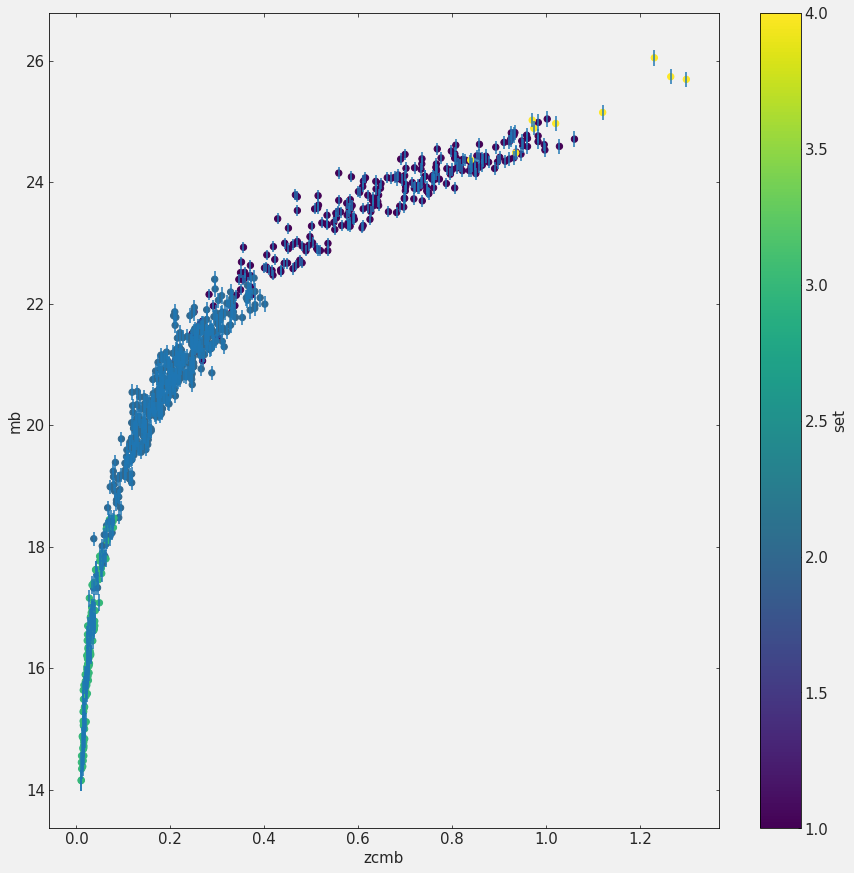

In [7]:
#scatter plot of the z-shift zcmb and brightness mb of supernovaes
ax = jla.plot.scatter("zcmb","mb",yerr="dmb",s=40,c= "set",colormap='viridis', figsize=(15,15))
ax.set(xlabel='zcmb', ylabel='mb');

###Figure 2: Supernovae brightness plotted against redshift z. Errorbars are shown for each data points. Different color of points indicate different sets of data. The plot shows power law between brightness and redshift of supernovae.

It is a **power law**, which means it will be linear in logarithmic space - specifically in log10(_x_) vs natural _y_ space.

Replot the data with natural y axis and logarithmic x axis, you can do that by taking the log of the data and then plotting it or by using plot functionalities (e.g. for ```df.plot.scatter()``` you can use ```logx=True```)

Note that when we talk about log we (generally) talk about log base 10! 


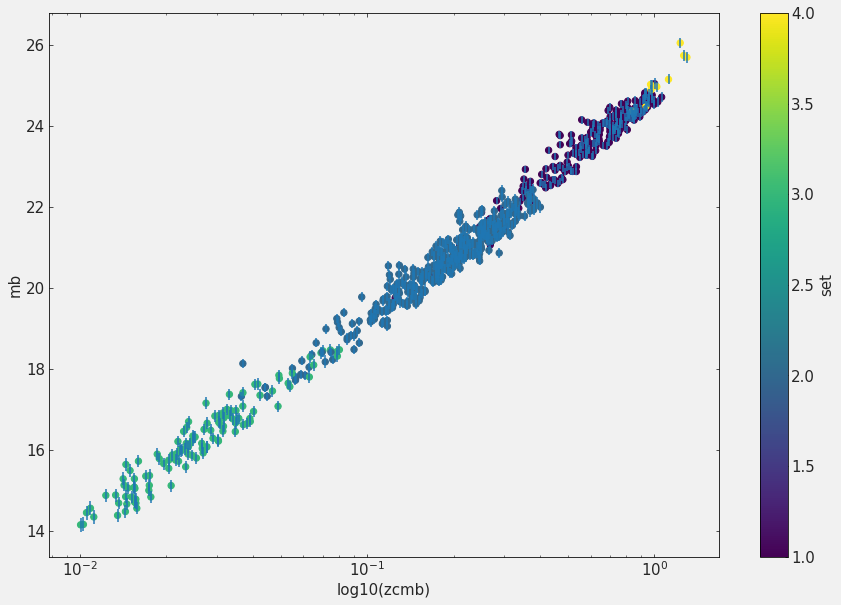

In [8]:
#plot using log of redshift
ax = pl.figure().add_subplot(111)
jla.plot.scatter("zcmb","mb",yerr="dmb",s=40,c= "set",colormap='viridis',logx=True, figsize=(15,10), ax=ax);
ax.set_xlabel("log10(zcmb)");
ax.set_ylabel("mb");

###Figure 3: Plot of supernovae brightness against log of redshift. It shows a trend.

# Fit a line to the data with scipy

For each model you fit below you should make a plot of the data and the model. Consider your fit to the data with the uncertainties your "baseline fit"

Like we did in class: fit a line using ```scipy.optimize``` (lab 5). Do it without and with the uncertainties on your _y_ data (the ```curvefit``` argument to include uncertainties in the endogenous variable is ```sigma```). Report the variace and the covariance by printing your mode uncertainties explicitly as below:





In [0]:
#defining a linear function
def line(x, a, b):
  """
  Takes two parameters (a and b) along with an array of x values. Returns y array.
  """  
  return a * x + b

In [0]:
#geting useful columns for plot
x_vals = jla["zcmb"]
logx_vals = np.log10(jla["zcmb"])
y_vals = jla["mb"]

In [0]:
#curve fit using linear function without yerr
popt, pcov = sp.optimize.curve_fit(line, logx_vals, y_vals, p0=[5, 0])
err = np.sqrt(np.diag(pcov))

In [12]:
#printing the linear fit parameters
print("slope = {:3.2f} +/- {:3.2f}".format(popt[0], err[0]  ))
print("intercept = {:3.2f} +/- {:3.2f}".format(popt[1], err[1]  ))
print("parameter covariance = {:4.5f} ".format(pcov[0][1]))

slope = 5.37 +/- 0.02
intercept = 24.66 +/- 0.02
parameter covariance = 0.00035 


In [0]:
#curve fit using linear function with yerr sigma
popt2, pcov2 = sp.optimize.curve_fit(line, logx_vals, y_vals, sigma = jla.dmb, p0=[5, 0])

err2 = np.sqrt(np.diag(pcov2))

In [14]:
#printing the linear fit parameters
print("slope = {:3.2f} +/- {:3.2f}".format(popt2[0], err2[0]  ))
print("intercept = {:3.2f} +/- {:3.2f}".format(popt2[1], err2[1]  ))
print("parameter covariance = {:4.5f} ".format(pcov2[0][1]))

slope = 5.43 +/- 0.02
intercept = 24.70 +/- 0.02
parameter covariance = 0.00036 


hint: remember to sort the data!

plot the data like you did above and the model you just created including the uncertainty band (look at lab5: there is a mistake we made in class which I corrected in the version I uploaded)

In [0]:
sorter = np.argsort(jla['zcmb'])

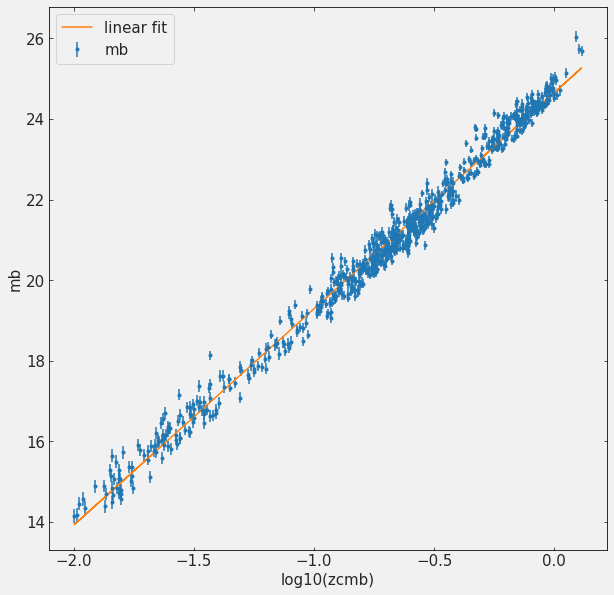

In [19]:
#before including error
pl.figure(figsize=(10,10))
pl.errorbar(logx_vals, y_vals, yerr = jla['dmb'], fmt = ".")

pl.plot(logx_vals, line(logx_vals, popt[0], popt[1]), 
        "-", label='linear fit')

pl.fill_between(logx_vals[sorter], 
                line(logx_vals[sorter], popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5),
                line(logx_vals[sorter], popt[0] - pcov[0][0]**0.5, popt[1] - pcov[1][1]**0.5))

pl.xlabel("log10(zcmb)")
pl.ylabel("mb");
pl.legend();


###Figure 4: Plot of supernovae brightness against log of redshift. Linear fit line as a model is also plotted.

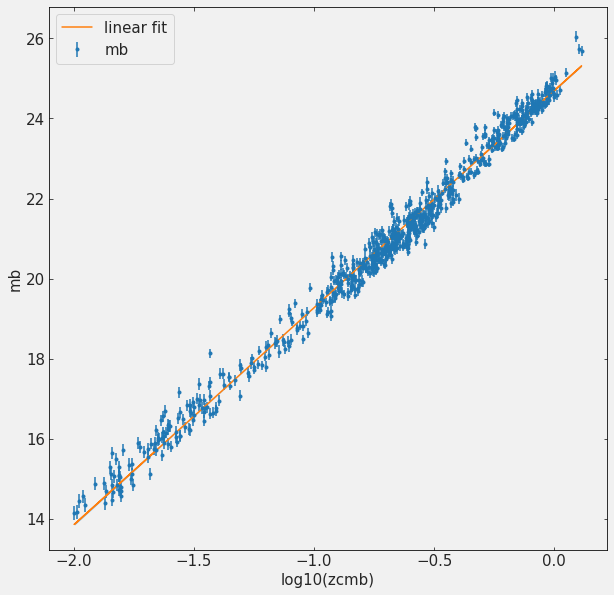

In [28]:
#including the error
pl.figure(figsize=(10,10))
pl.errorbar(logx_vals, y_vals, yerr = jla['dmb'], fmt = ".")

pl.plot(logx_vals, line(logx_vals, popt2[0], popt2[1]), 
        "-", label='linear fit')

Yup = line(logx_vals, popt2[0] + pcov2[0][0]**0.5, popt2[1] + pcov2[1][1]**0.5)
Ylow =line(logx_vals, popt2[0] - pcov2[0][0]**0.5, popt2[1] - pcov2[1][1]**0.5)
pl.fill_between(logx_vals[sorter], 
                Yup[sorter],Ylow[sorter]
                , alpha=0.5)

pl.xlabel("log10(zcmb)")
pl.ylabel("mb")
pl.legend();

###Figure 5: Plot of supernovae brightness against log of redshift. Linear fit line as a model is also plotted after considering the error for each data point.

Compare the *model* values and uncertainty you obtained by fitting the model with and without including the uncertainties on the y values.  Comment on your findings.

###Model values without including uncertainities are slope a = 5.37 +/- 0.02 and y-intercept b = 24.66 +/- 0.02. Model values with uncertainities are slope a = 5.43 +/- 0.02 and y-intercept b = 24.70 +/- 0.02. It shows that after including uncertainities, we obtained slightly higher value of model parameters and comparable uncertainities.

Now fit the data using only 1 every 20 points - use this: https://stackoverflow.com/questions/25876640/subsampling-every-nth-entry-in-a-numpy-array

Plot the new model and its uncertainty band and comment on the model: how do the three models compare?

In [0]:
#sampling every 20th point
logx_valsub = logx_vals[1::20]
y_valsub = y_vals[1::20]
y_uncer = jla['dmb'][1::20]
subset = jla.set[1::20]

In [0]:
popt3, pcov3 = sp.optimize.curve_fit(line, logx_valsub, y_valsub)

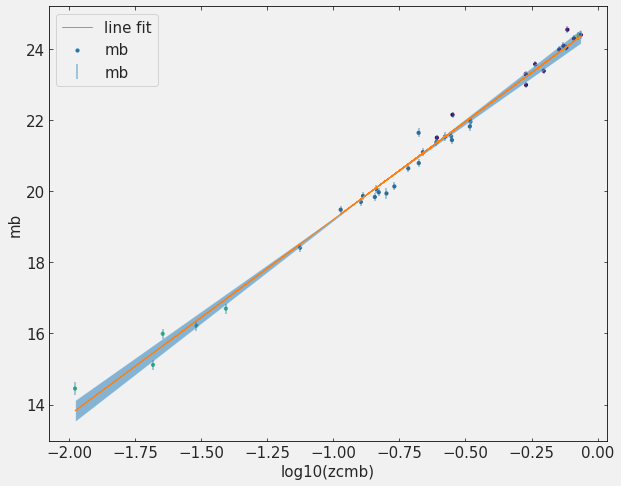

In [26]:
pl.figure(figsize=(10, 8))
pl.scatter(logx_valsub, y_valsub, c = subset, s = 10)
pl.errorbar(logx_valsub, y_valsub, yerr = y_uncer, linestyle ='None', alpha=0.5)
pl.plot(logx_valsub, line(logx_valsub, *popt3), linewidth=1.0, label='line fit')
## fillings to show the uncert in the fitting params
sorter1 = np.argsort(logx_valsub)

Yupper = line(logx_valsub.values, popt3[0] + 3*pcov3[0, 0]**0.5, popt3[1] + 3*pcov3[1,1]**0.5)
Ylower = line(logx_valsub.values, popt3[0] - 3*pcov3[0, 0]**0.5, popt3[1] - 3*pcov3[1,1]**0.5)
pl.fill_between(logx_valsub.values[sorter1],
                Yupper[sorter1], Ylower[sorter1],
                alpha=0.5)

pl.legend()
pl.xlabel("log10(zcmb)")
pl.ylabel("mb");

###Figure 4: Plot of supernovae brightness against log of redshift for samples of every 20th supernovae of the dataset. Linear fit line as a model is also plotted. we needed to scale the covariance matrix to show it on the plot, because the values were very small as can be seen from the previous plots.

# Fit a quadratic equation

Use the same function ```curve_fit()``` to fit a quadratic equation to the data. 
The equation is below

Plot your data, your original model which included uncertainties, and the current quadratic model


In [0]:
def quad(x, a, b, c):
    '''Quadratic equation
    Input:
    x: array-like, the exogenous variable
    a: parameters of the quadratic term
    b: parameter of the linear term
    c: intercept
    
    '''
    return a * x**2 + b * x + c


In [0]:
#fitting a quadratic equation
popt4, pcov4 = sp.optimize.curve_fit(quad, logx_vals, y_vals, p0=[5, 1, 0])
err2 = np.sqrt(np.diag(pcov2))

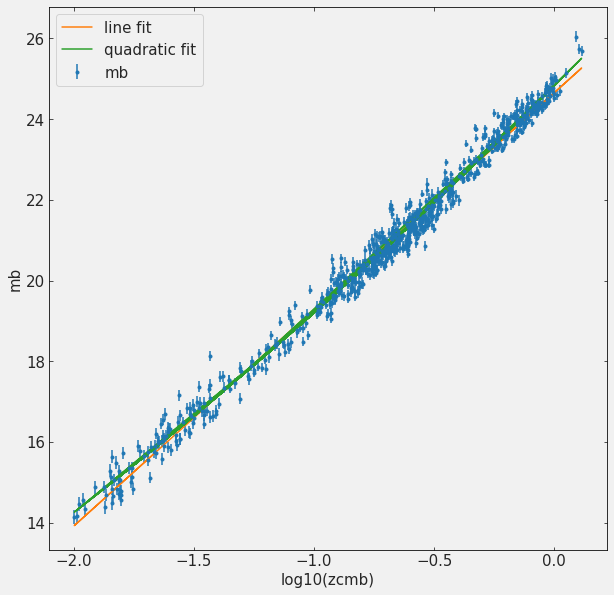

In [31]:
#linear and quadratic fit to the data
ax = pl.figure(figsize=(10,10)).add_subplot(111)
pl.errorbar(logx_vals, y_vals, yerr = jla['dmb'], fmt = ".")

ax.plot(logx_vals, line(logx_vals, popt[0], popt[1]), 
        "-", label="line fit")
ax.plot(logx_vals, quad(logx_vals, popt4[0], popt4[1], popt4[2]), 
        "-", label="quadratic fit")

pl.xlabel("log10(zcmb)")
pl.ylabel("mb")
pl.legend();

# Now fit the data with sklearn 
like we did in class (lab 5): create a regressor linear model and fit the data to it. Predict the y values based on the input data. Make the usual plot of data and model including your baseline model with scipy

In [0]:
import sklearn as skl
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

### The libraries should be imported at the start but I am leaving it here so that when I come back to see them, I know where I need them.

In [0]:
regr = skl.linear_model.LinearRegression() ## creating a regressor

In [0]:
x_vals = jla["zcmb"]
logx_vals = np.log10(jla["zcmb"]) ## log x-values
y_vals = jla["mb"] 
sorter = np.argsort(logx_vals) ## sorting the values
uncertanties = jla['dmb']

In [35]:
regr.fit(np.atleast_2d(logx_vals).T, y_vals) ## fitting using sklearn

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

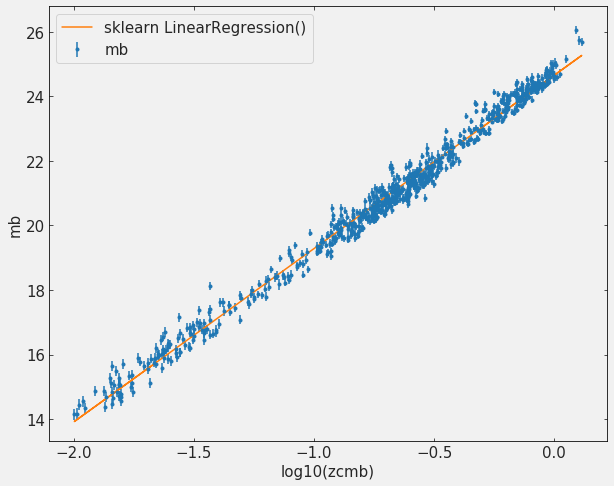

In [36]:
pl.figure(figsize=(10, 8))
pl.errorbar(logx_vals, y_vals, yerr = uncertanties, fmt = ".")
pl.plot(logx_vals, regr.predict(np.atleast_2d(logx_vals).T), '-', label="sklearn LinearRegression()")
pl.xlabel("log10(zcmb)")
pl.ylabel("mb")
pl.legend();

### The above figure shows fiting the data with sklearn.

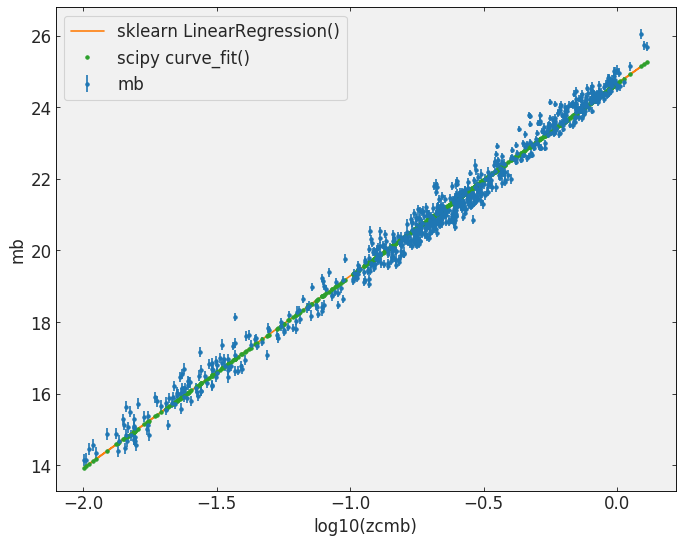

In [37]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

pl.errorbar(logx_vals, y_vals, yerr = uncertanties, fmt = ".")
pl.xlabel("log10(zcmb)")
pl.ylabel("mb");
pl.plot(logx_vals, regr.predict(np.atleast_2d(logx_vals).T), '-', label="sklearn LinearRegression()")
pl.plot(logx_vals, line(logx_vals, popt[0], popt[1]), ".", label="scipy curve_fit()")

# pl.plot(logx_vals[sorter], line(logx_vals[sorter], popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5))

pl.fill_between(logx_vals[sorter], 
                line(logx_vals[sorter], popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5),
                line(logx_vals[sorter], popt[0] - pcov[0][0]**0.5, popt[1] - pcov[1][1]**0.5), alpha=0.5)
pl.legend()
pl.xlabel("log10(zcmb)")
pl.ylabel("mb");

### The above figure shows the comparsion between the two fitting methods. They agree very nicely with each other. I plotted the scipyfit with the dots to show that the fit with both the models is there.

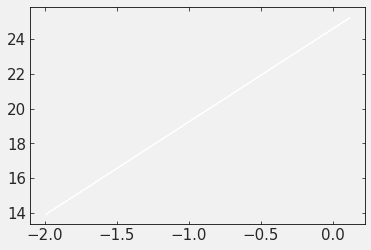

In [38]:
pl.fill_between(logx_vals[sorter], 
                line(logx_vals[sorter], popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5),
                line(logx_vals[sorter], popt[0] - pcov[0][0]**0.5, popt[1] - pcov[1][1]**0.5))

In [39]:
print (popt[0] + pcov[0][0]**0.5)
print (popt[0] - pcov[0][0]**0.5)

5.394301799147369
5.349807865752165


### The above step is just to make sure that we do have some uncertanity values but they are very small

### The R^2 score is given below

In [40]:
np.round(regr.score(np.atleast_2d(logx_vals).T, y_vals), 2)

0.99

# Cross valudation: Split your data into a training and test set
this is the "signature" of the machine learning approach. While this can be done using simply a random number generator
(see example)

do it using the sklear capabilities: ```skl.model_selection.train_test_split```. Read abnout the ```stratify``` funcionality of this method: it allows you to create unbiased train-test samples. In this case it is not necessary but it may be useful in your future!


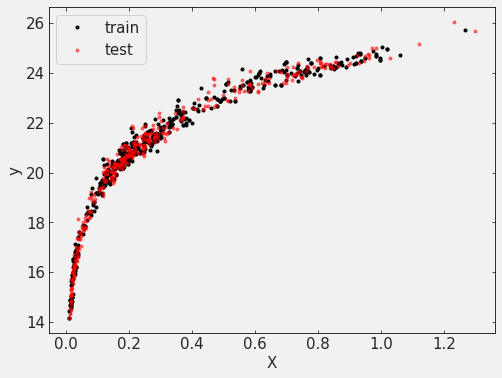

In [41]:
# handmade train-test split
Nall = len(jla)
Ntrain = int(Nall * 0.75)

train = numpy.random.randint(0, high=Nall, size=Ntrain)
test = np.setdiff1d(np.arange(Nall), train)

X_train, y_train = jla.zcmb[train], jla.mb[train]  ## data to train on 
X_test, y_test = jla.zcmb[test], jla.mb[test]  ## data to apply the test to

pl.figure(figsize=(8, 6))
pl.plot(X_train, y_train, 'k.', label="train")
pl.plot(X_test, y_test, 'r.', alpha=0.5, label="test")
pl.xlabel("X")
pl.ylabel("y")
pl.legend();

In [0]:
x_vals = jla["zcmb"]
logx_vals = np.log10(jla["zcmb"]) ## log x-values
y_vals = jla["mb"] 
sorter = np.argsort(logx_vals) ## sorting the values
uncertanties = jla['dmb']

In [0]:
#instead use sklern to split
X_train, X_test, y_train, y_test, yerr_train, yerr_test = skl.model_selection.train_test_split(
logx_vals, y_vals, uncertanties, test_size=0.33, random_state=42)

### This got in to error because the data was not properly shaped, so we had to reshape the  data.

In [44]:
xvals = np.reshape(logx_vals.values, (len(logx_vals), 1))
yvals = np.reshape(jla.mb.values, (len(logx_vals), 1))
yerr = np.reshape(jla.dmb.values, (len(logx_vals), 1))

regr = linear_model.LinearRegression()
regr.fit(xvals, yvals)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
#instead use sklern to split
X_train, X_test, y_train, y_test, yerr_train, yerr_test = skl.model_selection.train_test_split(
    xvals, yvals, yerr, test_size=0.33, random_state=42)

In [47]:
# fit on train set
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

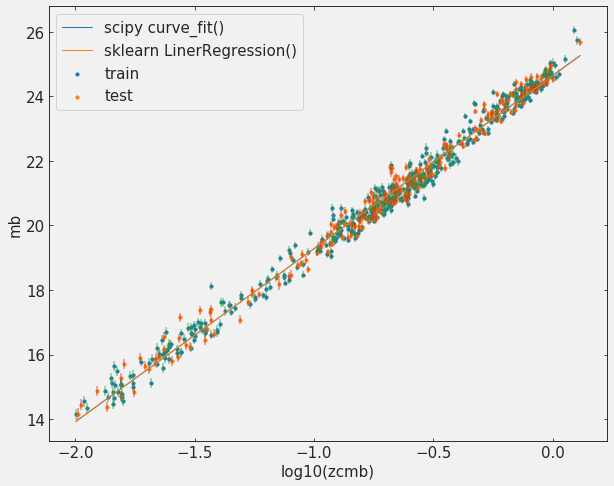

In [48]:
# Plot the train, and test dataset, linear model, and the sklearn prediction
pl.figure(figsize=(10, 8))

popt, pconv = popt, pcov
y_fit = line(logx_vals, *popt)
sorter = np.argsort(logx_vals)
pl.plot(logx_vals[sorter], y_fit[sorter], linewidth=1.0, label='scipy curve_fit()')

y_pred = regr.predict(xvals)
pl.plot(logx_vals[sorter], y_pred[sorter], linewidth=1.0, label='sklearn LinerRegression()')

pl.scatter(X_train, y_train, s=10, label='train')
pl.errorbar(X_train, y_train, yerr=yerr_train, linestyle='None', alpha=0.5, label=None)

pl.scatter(X_test, y_test, s=10, label='test')
pl.errorbar(X_test, y_test, yerr=yerr_test, linestyle='None', alpha=0.5)

pl.legend()
pl.xlabel('log10(zcmb)')
pl.ylabel('mb');

### Plot of all the different fitting models. The fitting seems very close to each other which means that all the test really agree with each other. 

Calculate the scores of the train and test set. Make considerations about the quality of the model including how robust it is (is it overfitting?)

In [49]:
print ("Score on the train data set :", regr.score(X_train, y_train))
print ("Score on the test data set :", regr.score(X_test, y_test))

('Score on the train data set :', 0.987704753856953)
('Score on the test data set :', 0.9869529602750878)


### The score indicates that this is not overfitting.